In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data= pd.read_csv('/content/sample_data/citrus.csv')

In [ ]:
data

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(data.drop('name',axis=1))

StandardScaler()

In [ ]:
scaled_features=scaler.transform(data.drop('name',axis=1))

In [ ]:
scaled_features

array([[-3.60195018, -3.02255396,  1.73997781,  0.76780981, -1.03337209],
       [-3.11420697, -2.978392  ,  1.16484825,  0.16992022, -0.92300682],
       [-2.85236589, -2.73464536,  0.20629897,  0.42615862, -1.03337209],
       ...,
       [ 2.88246734,  2.78833864,  1.3565581 ,  0.51157142,  0.95320276],
       [ 3.05189393,  2.91295068, -1.13567001, -0.34255657, -0.04008467],
       [ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209]])

In [ ]:
data_set = pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [ ]:
data_set

,name,diameter,weight,red,green
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [ ]:
from sklearn.model_selection import train_test_split
X=data_set
Y=data['name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[1290  169]
 [ 163 1378]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  grapefruit       0.89      0.88      0.89      1459
      orange       0.89      0.89      0.89      1541

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In [ ]:
error_rate=[]
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

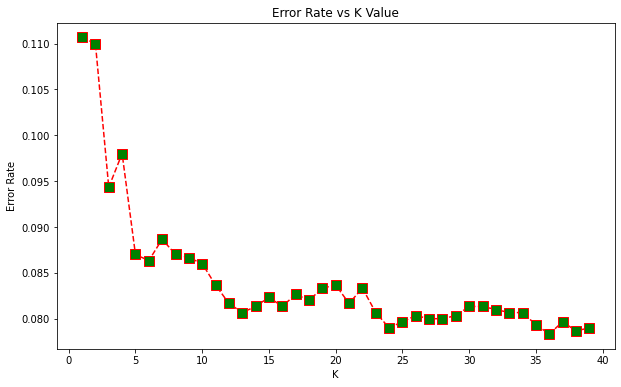

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='s',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[1315  144]
 [ 139 1402]]


              precision    recall  f1-score   support

  grapefruit       0.90      0.90      0.90      1459
      orange       0.91      0.91      0.91      1541

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

